In [1]:
import sklearn
import pickle
import numpy as np 
from tslearn.datasets import UCR_UEA_datasets

# Parameters

In [2]:
dataset='NATOPS'

# Load Data

In [3]:
train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)

In [4]:
print(train_x.shape)
print(test_x.shape)

(180, 51, 24)
(180, 51, 24)


In [5]:
enc1=sklearn.preprocessing.OneHotEncoder(sparse=False).fit(np.vstack((train_y.reshape(-1,1),test_y.reshape(-1,1))))
pickle.dump(enc1,open(f'../../ClassificationModels/models/{dataset}/OneHotEncoder_tf.pkl','wb'))

train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1))
    

# Load Model

In [6]:

import tensorflow as tf 
model = tf.keras.models.load_model(f'../../ClassificationModels/models/{dataset}/cnn/NATOPSbest_model.hdf5')

2022-10-27 10:17:51.991448: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-27 10:17:51.991466: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-27 10:17:53.774855: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-27 10:17:53.774882: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-27 10:17:53.774903: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jacqueline-ThinkPad-P53): /proc/driver/nvidia/version does not exist
2022-10-27 10:17:53.775067: I tensorflow/core/platfor

In [7]:
label_pred=np.argmax(model.predict(test_x),axis=1)
label_pred

6/6 [==============================] - 0s 2ms/step


array([3, 4, 5, 0, 3, 2, 2, 2, 2, 0, 4, 3, 2, 4, 1, 0, 4, 0, 4, 0, 2, 3,
       5, 5, 1, 2, 2, 0, 1, 4, 2, 3, 5, 4, 3, 5, 3, 0, 3, 5, 4, 2, 1, 5,
       0, 2, 4, 3, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 4, 1, 4, 5, 0, 5, 1, 1,
       1, 2, 4, 1, 5, 3, 0, 3, 4, 3, 1, 4, 4, 2, 0, 4, 3, 5, 2, 5, 2, 5,
       5, 4, 4, 2, 4, 3, 5, 2, 1, 5, 0, 3, 0, 5, 3, 5, 0, 5, 5, 0, 2, 5,
       0, 1, 1, 4, 1, 0, 0, 2, 4, 1, 0, 3, 4, 3, 1, 2, 2, 2, 2, 0, 4, 0,
       0, 1, 3, 4, 4, 2, 1, 1, 1, 4, 4, 3, 1, 4, 0, 4, 5, 5, 1, 5, 3, 3,
       5, 5, 4, 3, 5, 1, 3, 2, 3, 0, 1, 3, 0, 2, 5, 2, 3, 5, 3, 1, 0, 5,
       2, 4, 3, 3])

# Explanation Algo

In [8]:
item=test_x[0].reshape(1,test_x.shape[1],test_x.shape[2])
shape=item.shape
y_target= model.predict(item)

1/1 [==============================] - 0s 18ms/step


In [9]:
y_target

array([[7.0318120e-09, 4.3381502e-07, 1.7595490e-05, 9.9951905e-01,
        1.7949790e-06, 2.5720207e-04]], dtype=float32)

In [10]:
from TSInterpret.InterpretabilityModels.counterfactual.Ates import AtesCF

exp_model= AtesCF(model,(train_x,train_y),mode='time', backend='TF', method= 'opt')


In [11]:
exp = exp_model.explain(item)

1/1 [==============================] - 0s 48ms/step
Current may 3
5
1/1 [==============================] - 0s 17ms/step


In [12]:
array, label=exp

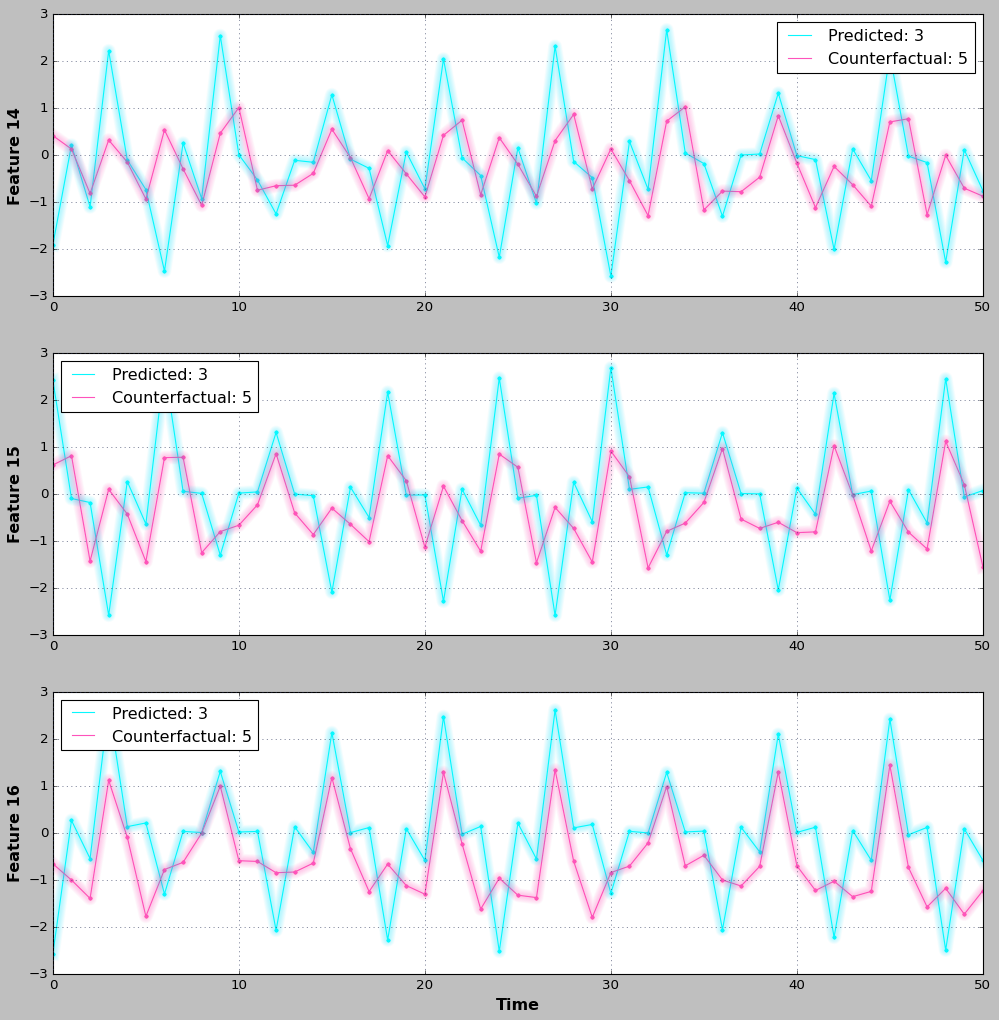

In [13]:
%matplotlib inline
org_label=np.argmax(y_target)
cf_label=label[0]
exp=array

exp_model.plot_in_one(item,org_label,exp,cf_label,figsize=(15,15))